# Let's create some visualizations of our NFL data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = "../../nfl/data/nfl_data.xlsx"
df = pd.read_excel(path)

### Look at the distributions of each variable.
The code is commented out because of the long output.

In [ ]:
'''
for i in df.copy().drop(["Team", "Playoff"], axis = 1).columns:
    plt.figure()
    sns.kdeplot(df[i])
'''

### Look at correlations
To see a tabular visualization of the correlations, you can reference the `exploration.ipynb` file. 

<Axes: >

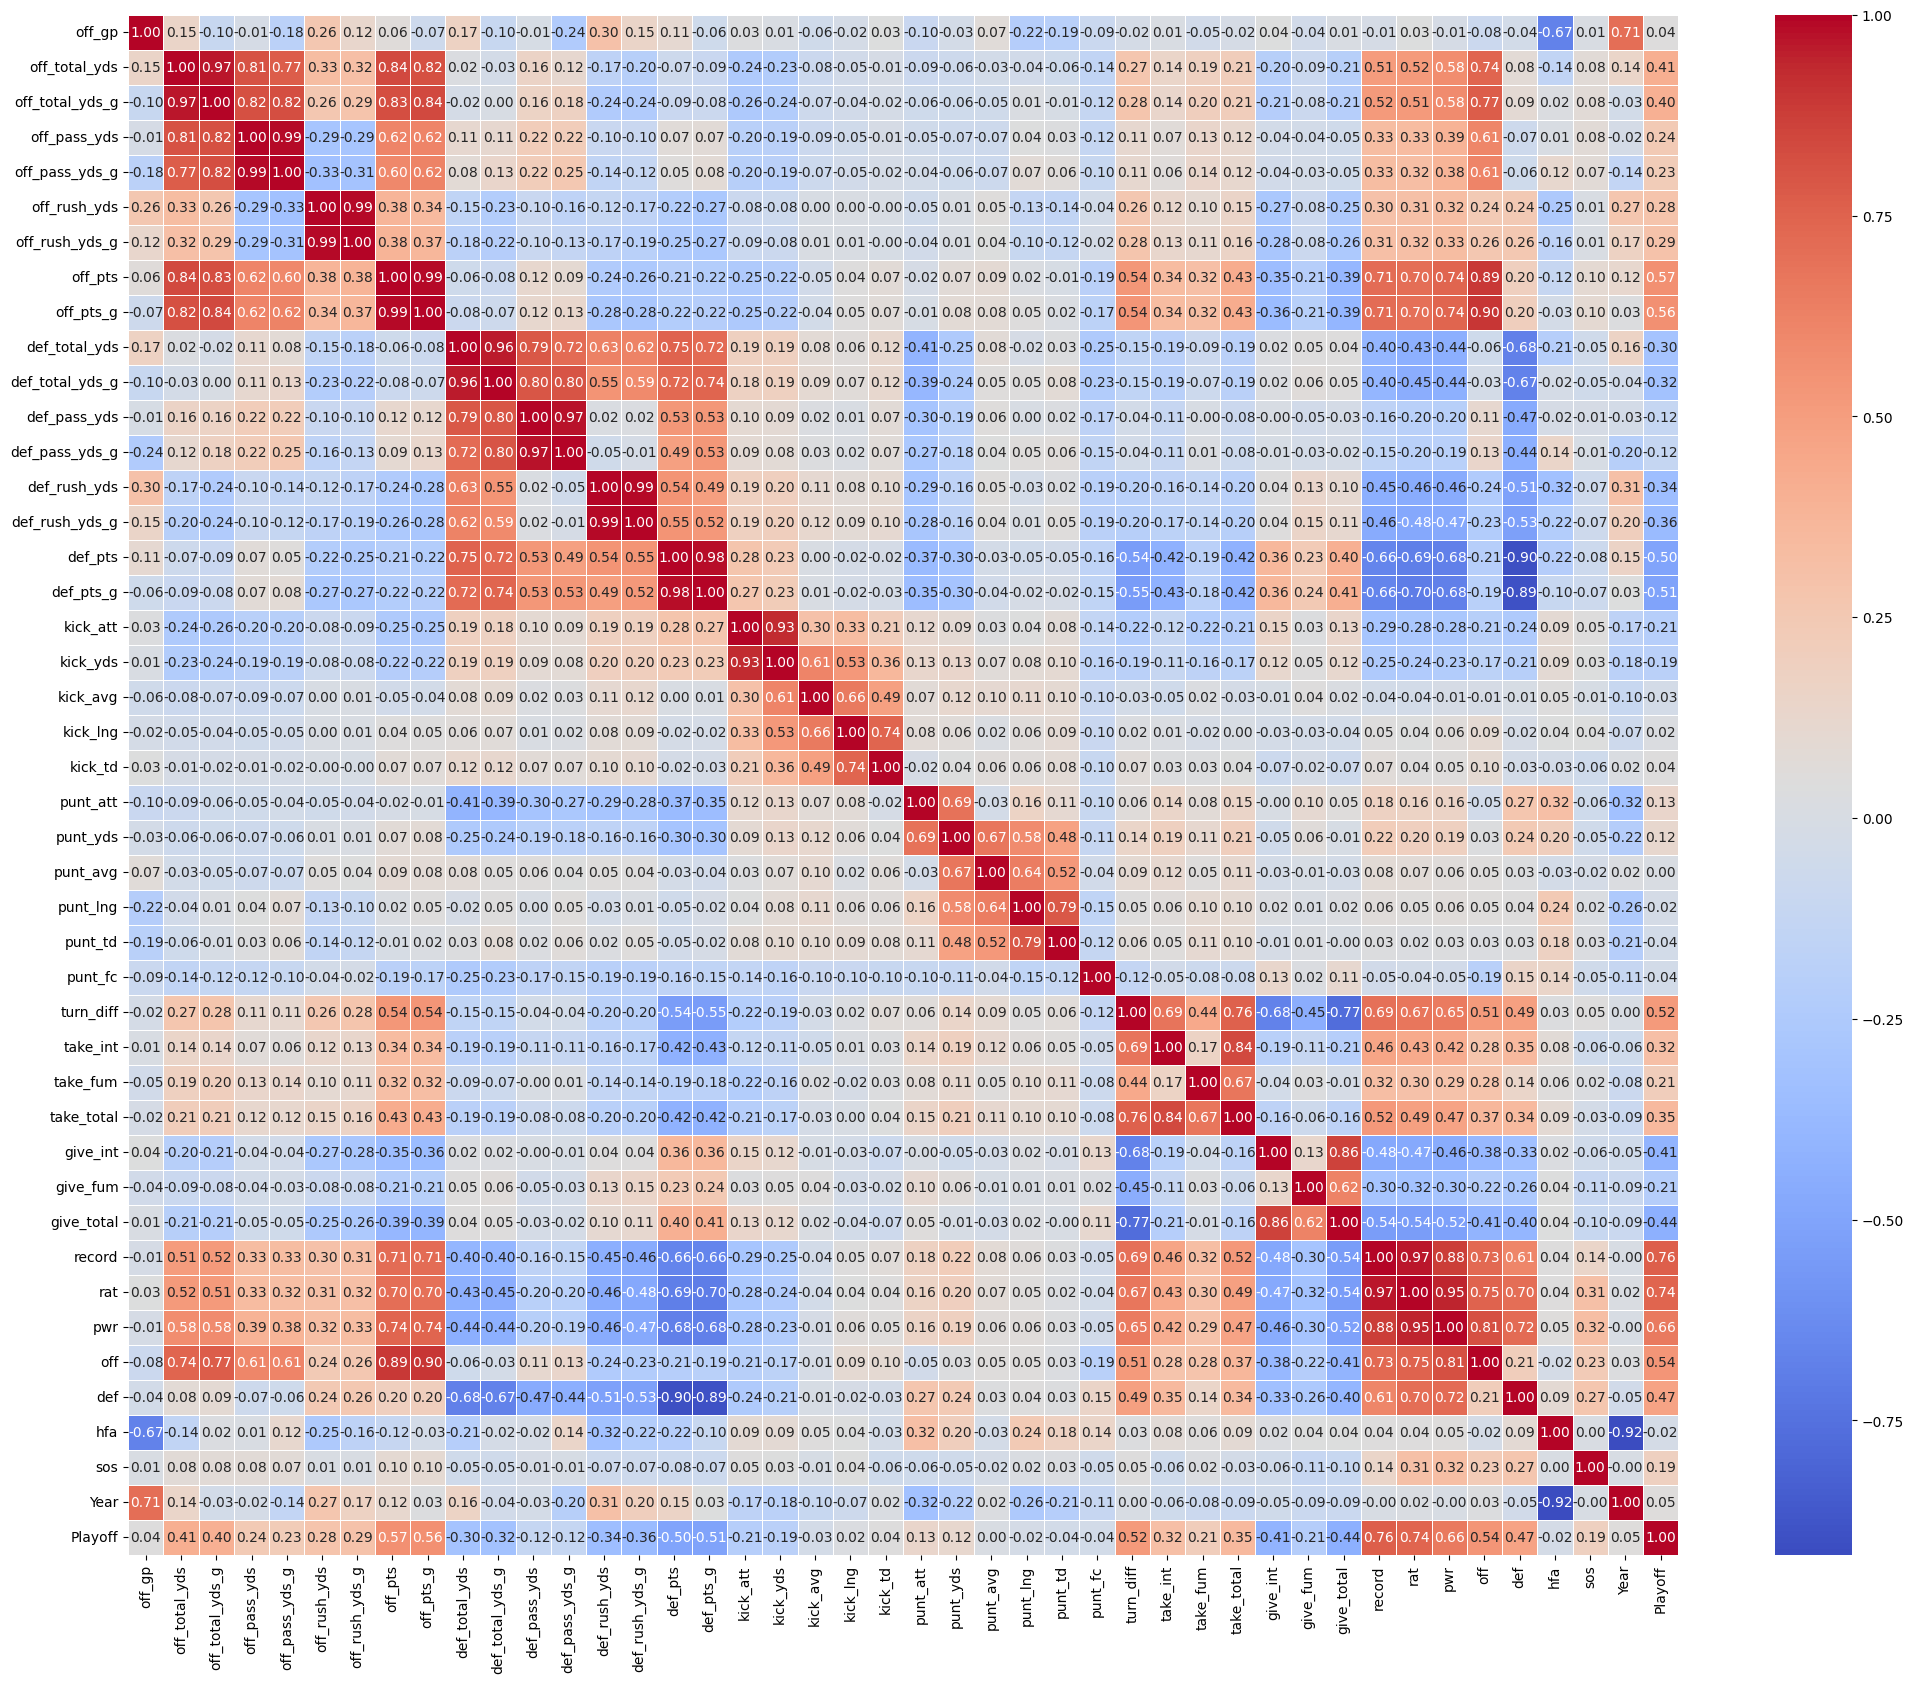

In [26]:
corr_mat = df.drop("Team", axis  = 1).corr()
plt.figure(figsize =(25, 20))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### Compare the average stats of teams that made the playoffs versus those who did not.
First, group the original data by the "Playoff" variable and calculate the conditional means. Then, convert the stacked data frame into a normal data frame by converting the values to records and resetting the index. Finally, melt the data frame using "Playoff" as the id to allow for easy side-by-side visualization. Let's look specifically at the Massey ratings. 

In [3]:
conditionalMeans = df.groupby("Playoff").mean(numeric_only= True)
conditionalMeans = pd.DataFrame(conditionalMeans.to_records()).reset_index()
conditionalMeansMelted = pd.melt(conditionalMeans, id_vars= ["Playoff"], 
                                 value_vars=["rat", "pwr", "def", "hfa", "sos"])

#### Side-by-side barplot:

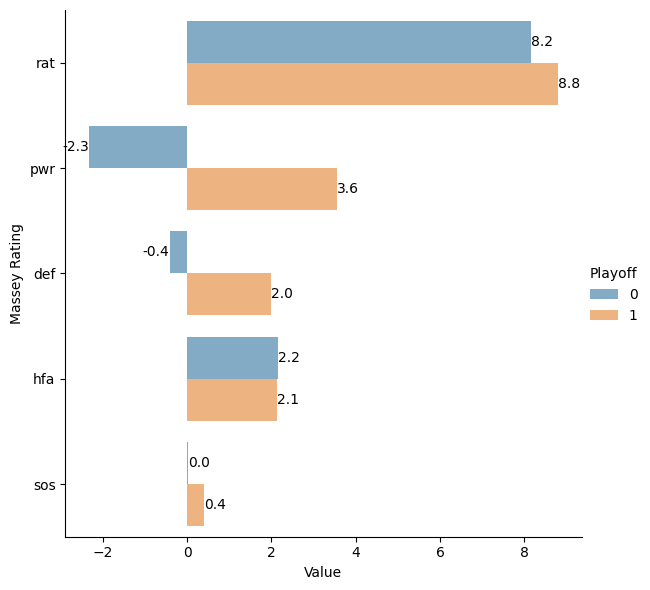

In [22]:
bars = sns.catplot(
    data = conditionalMeansMelted, kind = "bar",
    x = "value", y = "variable", hue = "Playoff",
    errorbar = "sd", alpha = .6, height = 6,
)
ax = bars.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_width()):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
bars.set_xlabels("Value")
bars.set_ylabels("Massey Rating")



### Look at relationships between "per game" variables.

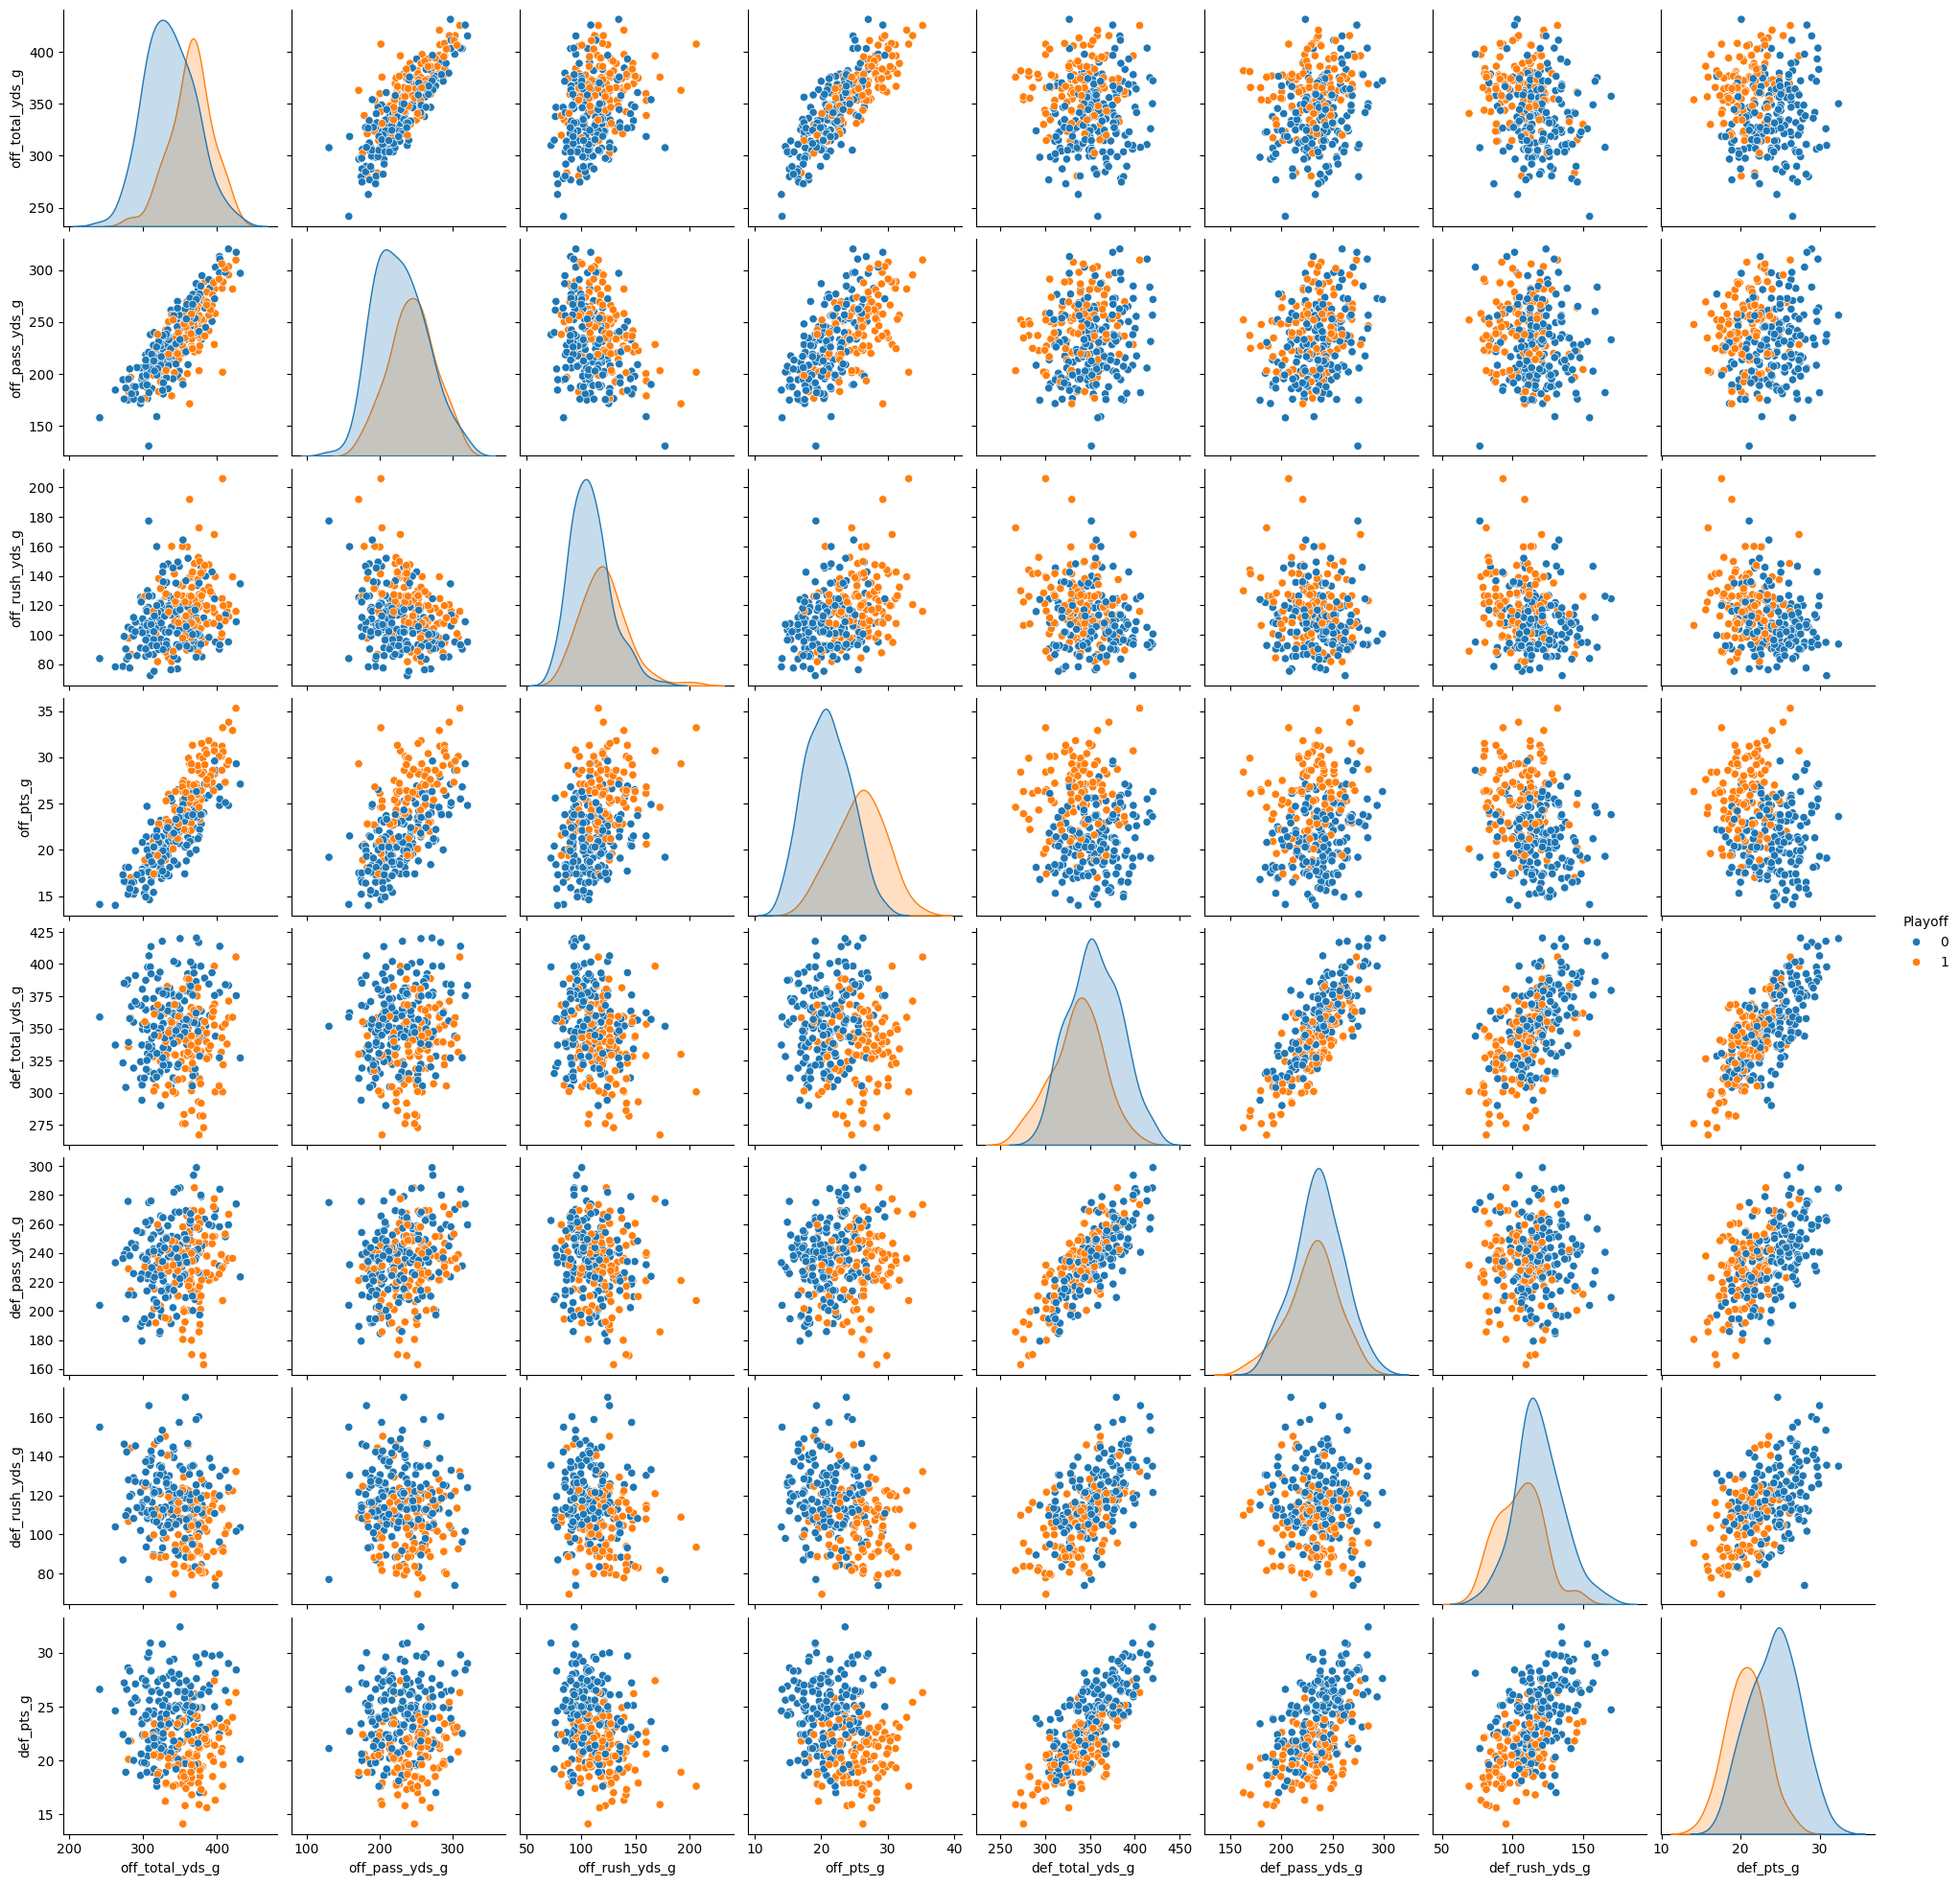

In [27]:
matrixData = df[["Playoff", "off_total_yds_g", "off_pass_yds_g", "off_rush_yds_g", 
                "off_pts_g", "def_total_yds_g", "def_pass_yds_g", "def_rush_yds_g",
                "def_pts_g"]]
sns.pairplot(matrixData, diag_kind="kde", hue = "Playoff")

### Compare chosen and previous year stats for individual teams.

In [29]:
gameData = df[["Team", "Year", "off_total_yds_g", "off_pass_yds_g", "off_rush_yds_g", 
                "off_pts_g", "def_total_yds_g", "def_pass_yds_g", "def_rush_yds_g",
                "def_pts_g"]]
teamFilter = "Miami Dolphins"
yearFilter = "2022"
yearList = [int(yearFilter), (int(yearFilter)-1)]
gameFiltered = gameData[(gameData["Team"] == teamFilter)&
                        (gameData["Year"] == int(yearFilter))]

gameFiltered = gameData[(gameData["Team"] == teamFilter)&
                        (gameData["Year"].isin(yearList))]
                        

gameFiltered = gameFiltered.rename(columns = {"off_total_yds_g":"Offensive Total Yds. Per Game",
                                    "off_pass_yds_g":"Offensive Passing Yds. Per Game", 
                                    "off_rush_yds_g":"Offensive Rushing Yds. Per Game", 
                                    "off_pts_g":"Offensive Points Per Game", 
                                    "def_total_yds_g":"Defensive Total Yds. Per Game", 
                                    "def_pass_yds_g":"Defensive Passing Yards Per Game", 
                                    "def_rush_yds_g": "Defensive Rushing Yards Per Game",
                                    "def_pts_g":"Defensive Points Per Game"
    
})

gameMelted = pd.melt(gameFiltered, id_vars = ["Team", "Year"],
                     value_vars = ["Offensive Total Yds. Per Game",
          "Offensive Passing Yds. Per Game",
          "Offensive Rushing Yds. Per Game",
          "Offensive Points Per Game",
          "Defensive Total Yds. Per Game",
          "Defensive Passing Yards Per Game",
          "Defensive Rushing Yards Per Game",
          "Defensive Points Per Game"])
gameMelted["Year"] = gameMelted["Year"].astype(str)

fig = px.bar(gameMelted, x = "value", y = "variable", color="Year", barmode = "group",
             labels = {
                 "value":"",
                 "variable":""
             },
             text_auto = True,
             title = teamFilter)
fig.show()